## 이번주 목표(얼룩말 책 7장)                
---       

### 이미지 검출(다각형 검출)          
    - 가장자리 검출
    - 윤곽선 검출       
    - 다각형 근사         
    - 코너 검출       
    - 직선 검출        
    - 원 검출

## 이미지 검출          
---      

### 0. 시작하기 전에                

- 이미지 검출은 __영상 내에서 주요한 특징점(Feature Point)을 검출하는 방법으로__, 특징점이 존재하는 위치를 알려주거나 해당 특징점을 부각한다.         
- From : 픽셀의 색상 강도, 연속성, 변화량, 의존성, 유사성, 임계점 등으로 특징을 파악해서         
- To : 가장자리(Edge), 윤곽선, 코너, 블록 껍질, 모멘트, 직선, 원 등을 구분한다.         

#### 1. 가장자리 검출        
- 이미지 내의 가장자리 검출을 위한 알고리즘      
- __픽셀의 그래디언트의 상위 임계값과 하위 임계값을 사용해 가장자리를 검출한다.__      
- 픽셀의 연속성, 연결성 등이 유효해야 하며, 가장자리의 일부로 간주되지 못한 픽셀은 제거되어 가장자리만 남게 된다.     

#### 2. 윤곽선 검출        
- 이미지 내의 윤곽 검출을 위한 알고리즘     
- __동일한 색상이나 비슷한 강도를 가진 연속한 픽셀을 묶어 처리한다.__      
- 윤곽 검출을 통해 모멘트, 면적, 경계선, 코너, 블록 껍질, 피팅 등을 적용할 수 있다.         

#### 3. 직선 검출        
- 이미지의 모든 점에 대한 교차점을 추적한다.         

#### 4. 원 검출             
- 이미지에서 방사형 대칭성이 높은 객체를 효과적으로 검출한다.(한 점을 중심으로 방사형으로/대칭적으로 퍼져있는 객체를 검출한다는 뜻인 것 같습니다.)        

## 1. 가장자리 검출         
--- 

- 가장자리 : 가장 바깥 부분의 둘레, 객체의 테두리      
- 가장자리 : 전경/배경이 구분되는 지점, __전경과 배경 사이에서 밝기가 큰 폭으로 변하는 지점이 객체의 가장자리가 된다.__    
- 그러므로, 가장자리는 픽셀의 밝기가 급격하게 변하는 부분으로 간주할 수 있다.      

- 어떻게 검출하는가?
     1. 픽셀의 밝기 변화율이 높은 부분이 가장자리이므로,     
     2. __미분과 기울기 연산을 수행__ 하여 픽셀의 밝기 변화율이 높은 곳을 찾는다.  

- 1차 미분에서는 극대값/극소값이 가장자리가 되고           
- 2차 미분에서는 제로 크로싱(기울기가 양수->음수로 변화될 때 0의 값을 갖는 위치)가 가장자리가 된다.     
- 픽셀의 밝기에 따른 미분을 진행하므로, 노이즈가 심할 경우 극값/제로크로싱을 제대로 알 수 없으므로 노이즈를 제거하거나 최소화 한 후 검출을 진행한다.

> Q1. 미분 형태의 가장자리 유형은 어떤 것들이 있나요? 가장자리를 검출하는 방식에는 어떤 것들이 있는지 말해주세요.

- 스텝, 램프, 라인, 루프      
1. 스텝 : 계단식으로 픽셀값이 갑자기 변함        
2. 램프 : 노이즈가 제거된 수의 스텝            
3. 라인 : 픽셀값이 급격히 변한 후 다시 돌아옴        
4. 루프 : 노이즈가 제거된 뒤의 라인

### 소벨 미분

- 미분 값을 구할 때 가장 많이 사용되는 연산자이다.      
- 커널을 사용해 미분하며, 커널의 크기는 홀수 값을 갖는다.     
- 커널 내부의 원소 합은 0이 되어야 한다.(중심을 바탕으로 대칭형을 많이 사용한다.) 

[소벨 미분의 개념 이해가 어렵다구요? 이 강좌를 보세요!](https://youtu.be/-4E2-0sxVUM?t=172)

### 샤르 필터

- 소벨 미분의 단점을 보완한 방식     
- 소벨 연산자의 경우 커널의 크기가 작으면 정확도가 떨어지는데, 이를 해결하기 위한 방식이다.

> Q2. 소벨 미분과 샤르 필터의 차이점은 무엇인가요?

- 3*3만 지원함, 값 차이가 크게 남(소벨 미분은 커널이 작을수록 효과가 떨어지며, 이를 보완하기 위해 나온것이 샤르 필터이므로 필터로 쓰이는 커널의 값 차이가 많이 남)

### 라플라시안

- 라플라시안은 2차 미분의 형태이다.        
- 라플라시안은 1차 미분으로 알게 된 "가장자리의 존재 여부" 에서 더 나아가, __이 가장자리가 밝은곳에서 발생했는지 어두운곳에서 발생했는지__ 를 알게 한다.

> Q3. python opencv의 라플라시안 연산 함수를 확인하고, 소벨 연산과의 차이점을 적어보세요.

dst = cv2.Laplaciansrc, ddepth, ksize, scale=None, delta=None, borderType=None)

- 소벨 연산자를 직접 계산에 사용한다.      
- 소벨 연산에 기반을 두고 있다.       
- 커널의 크기가 소벨 미분 커널을 의미하며, 2차 미분 계산을 위해 샘플링하는 영역의 크기가 다르다는 것.

### 캐니 엣지             

- 캐니 엣지란 __라플라스 필터 방식을 개선한 것으로,__ 노이즈에 민감하지 않아 강한 가장자리를 검출하는 데 목적을 둔 알고리즘이다.

> Q4. 캐니 엣지 알고리즘은 어떻게 동작합니까? 순서대로 적어보세요.

1. 가우시안 필터로 흐림효과 적용하여 노이즈 제거        
2. 소벨 필터로 기울기갚이 높은 지점을 검출       
3. 최댓값이 아닌 픽셀값을 0으로 변경(가장자리가 아닌 곳 제거)       
4. 히스테리시스 임계값으로 상위 임계값 이상의 값만 가장자리로 간주

> Q5. 이미지를 하나 불러와, 예제 7.2(python opencv에서의 캐니 엣지)를 수행하고 결과를 확인해보세요.

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = './PostingPic/cat.jpg'

cat = cv2.imread(image_path)

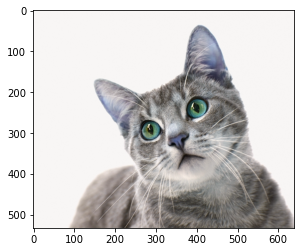

In [6]:
plt.imshow(cat)

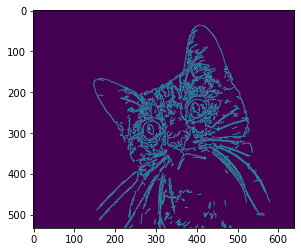

In [8]:
dst = cv2.Canny(cat, 100, 200, apertureSize=3, L2gradient=True)

plt.imshow(dst)

## 2. 윤곽선 검출         
---

- 가장자리 검출은 가장자리 픽셀의 요소는 알 수 있었지만, 검출된 객체들의 구성 요소가 구분되어 있지 않아 형태를 알 수 없었다.       
- 윤곽선 검출은 __가장자리가 검출된 픽셀을 대상으로 세그멘테이션을 진행한다.__     

- 윤곽선을 검출하는 과정      
    1. 검출하기 좋은 상태의 이미지를 만든다.(노이즈 제거)      
    2. 윤곽선 검색 방법과 근사 방법을 선택       
        - 모든 윤곽선을 반환할 것인가?     
        - 검출된 윤곽선 중 강도가 높은 윤곽점만 반환할 것인가?     
        
    3. 계층 구조의 형태            
        - 검색 방법에 따라 계층 구조가 달라지며, 이 계층 구조의 윤곽선들이 어떤 형태로 연결/분리되어 있는지 확인할 수 있다.

### 계층 구조

> Q6. 계층 구조는 기본적으로 어떤 형태를 띱니까? 계층 구조의 내용을 정리하여 설명해주세요.

- 트리 구조, 여러 노드가 한 노드를 가리킬 수 없다.           
- 루트 노드, 부모 노드, 자식 노드

### 윤곽선 검출         

- __윤곽선 검출 함수의 주요 매개변수는 1. 검색 방법 과 2. 근사 방법  을 선택하는 것이다.__ 

- 검색 방법은 윤곽선을 검출해 어떤 계층 구조에 적용할 것인지를 설정하며,      
- 근사 방법은 윤곽점의 표시 방법을 설정한다.

> Q7. python opencv의 윤곽선 검출 함수에 대해 적어보고, 각각의 요소가 무슨 역할을 하는지 설명해주세요.

cv2.findContous(image, mode, method)

- 검색방법(mode) : 어떻게 검색하여 어떤 계층구조 형태를 사용할 지 정함         
- 근사방법(method) : 검출된 윤곽선의 표시 방법을 설정 

> Q8. 표 7.1을 참고하여, 검색 방법에는 어떤 것들이 있는지 알려주세요.

> Q9. 표 7.2를 참고하여, 근사 방법에는 어떤 것들이 있는지 알려주세요.

### 윤곽선 그리기        

> Q10. 예제 7.4(python opencv에서의 윤곽선 검출)를 수행해보세요.

## 3. 다각형 근사           
---

- 다각형 근사는 검출된 윤곽선의 형상을 분석할 때 정점의 수가 적은 다각형으로 표현하도록, 다각형 곡선을 근사하는 방법이다.     
- 윤곽선 검출 함수에서 반환된 윤곽선 정보를 활용해 윤곽점의 개수를 축소한다.

> Q11. 왜 정점의 수가 적은 것이 중요한가요? 아래의 그림을 보고 그 의미를 추측해봅시다.      
- 로우폴리와 하이폴리 

![로우앤하이](./PostingPic/lowandhigh.png)

- 다각형 근사는 더글라스-패커 알고리즘을 사용한다.      
- 반복과 끝 점을 이용해, 선분으로 구성된 윤곽선들을 더 적은 수의 윤곽점으로, 동일하거나 비슷한 윤곽선으로 데시메이트(가위질!) 한다.

> Q12. 예제 7.6(python opencv에서의 다각형 근사)를 수행해보세요.

### 윤곽선 정보

1. 윤곽선 길이 계산      
2. 윤곽선 면적 계산     
3. 윤곽선 경계 사각형     
4. 윤곽선의 최소 면적 사각형          
5. 윤곽선의 최소 면적 원      
6. 윤곽선의 타원 피팅      
7. 윤곽선의 볼록 껍질       
8. 윤곽선의 볼록성 시험       
9. 윤곽선의 모멘트

> Q12. 위의 윤곽선 정보 요소들을 차분히 읽고, 홀수/짝수 번호를 선택하여 해당 번호의 정보들에 대해 설명해주세요.

> Q13. 스크랜스키 알고리즘이란 무엇인가요? 위의 윤곽선 관련 함수 중 특히 어디에 쓰이나요?

## 4. 코너 검출

- 코너 검출은 __이미지 상에서 코너점을 검출하는 알고리즘이다.__      
- 다각형의 꼭지점 검출이라기 보다는, __트래킹하기 좋은 지점을 코너라 한다.__     

- 코너점은 앞서 배운 다각형 근사의 근사치 정확도 값으로 검출할 수도 있지만, 여기에서는 코너 강도를 계산하여 검출해보기로 한다.    
- 코너 검출 알고리즘은 __높은 도함수를 갖는 지점을 계산해서,(가장 두드러지는 코너점) 코너의 정의에 만족하는 지점을 반환한다.__

> Q14.python opencv의 코너 검출 함수를 적어보세요.      
> - 코너 최댓값
> - 코너 품질
> - 마스크
> - 블록 크기             가 갖는 의미는 각각 무엇인가요?

##### 해리스 코너 검출기        

- 코너 강도를 계산하는데 사용할 알고리즘       
- true이면 해리스 코너 검출기를, false이면 지안보 시와 카를로 토마시가 개선한 특징 검출 알고리즘을 사용한다.

> Q15. 해리스 코너 검출기 알고리즘은 무엇인가요? 내용을 찾아보고, 요약하여 적어주세요.

> Q16. 예제 7.8(python opencv에서의 코너 검출 및 코너 픽셀 세밀화)를 수행해보세요. (사람 형태의 이미지를 권장합니다.)

## 5. 직선검출

- 이미지에서 선형적인 부분을 검출하기 위해 사용한다.        
- 직선 검출 알고리즘은 허프 변환(Hough Transform) 알고리즘을 활용해 직선을 검출한다.         

> Q17. 허프 변환 알고리즘에 대해 찾아보고, 내용을 요약해 보세요.

- opencv의 허프 변환은 총 세 종류의 변환을 지원한다.         
    1. 표준 허프 변환       
    2. 멀티 스케일 허프 변환       
    3. 점진성 확률적 허프 변환

> Q18. 위의 세 종류 허프 변환에 대해 짧게 설명해주세요.

> Q19. 예제 7.10(python opencv에서의 허프 변환)을 수행해보세요.

## 6. 원 검출

- 원 검출 역시 허프 변환 알고리즘 중 하나인 허프 원 변환 알고리즘을 활용해 원을 검출한다.         
- 허프 원 변환 알고리즘은 2차원이 아닌 3차원 누산 평면으로 검출한다.        

[3차원 누산 평면에서의 검출 알고리즘을 설명한 블로그](https://doongdoongeee.tistory.com/37)

> Q20. python opencv의 허프 원 변환 함수는 어떻게 표현되는지 알려주세요.

> Q21. 예제 7.12(python opencv에서의 허프 원 변환)을 수행하여 확인해보세요.(원이 많은 이미지를 사용해보세요.)

### 이번 차시 실습은 여기까지입니다! 고생하셨습니다 :)